In [99]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Loading the dataset
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [101]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [102]:
print(" The shape of the dataset is : ",df.shape)

 The shape of the dataset is :  (19689, 10)


# Preprocessing of the dataset

In [103]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [105]:
# to check the unique values
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** Crop *********************************

{'Cashewnut', 'Arhar/Tur', 'Sannhamp', 'Bajra', 'Soyabean', 'Khesari', 'Barley', 'Sugarcane', 'Cotton(lint)', 'Jowar', 'Onion', 'Coconut ', 'Other Kharif pulses', 'Tapioca', 'Potato', 'Safflower', 'Tobacco', 'Cardamom', 'Jute', 'Mesta', 'Small millets', 'Turmeric', 'Cowpea(Lobia)', 'Ginger', 'Ragi', 'Other Summer Pulses', 'other oilseeds', 'Arecanut', 'Other  Rabi pulses', 'Linseed', 'Moong(Green Gram)', 'Maize', 'Banana', 'Wheat', 'Gram', 'Rapeseed &Mustard', 'Dry chillies', 'Sesamum', 'Coriander', 'Horse-gram', 'Peas & beans (Pulses)', 'Garlic', 'Sunflower', 'Guar seed', 'Moth', 'Groundnut', 'Other Cereals', 'Castor seed', 'Black pepper', 'Masoor', 'Sweet potato', 'Rice', 'Urad', 'Oilseeds total', 'Niger seed'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

In [106]:
# Check the duplicates record
df.duplicated().sum()

0

In [107]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


#  Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

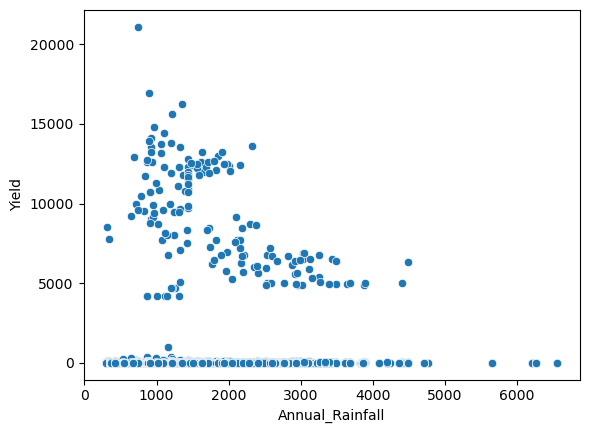

In [108]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

# Analysis of data (Year wise)

In [109]:
df_year = df[df['Crop_Year']!=2020] #as the data of 2020 is incomplete

In [110]:
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole Year Kharif Kharif Whole Year Kh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,Kharif Kharif Kharif Kharif Su...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447
2002,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07,65734.814831
2003,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07,67039.368873
2004,ArecanutArhar/TurBajraBajraBajraBananaBlack pe...,Whole Year Kharif Kharif Rabi Su...,KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07,63905.917053
2005,ArecanutArhar/TurBajraBajraBananaCashewnutCast...,Whole Year Kharif Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07,70140.586280


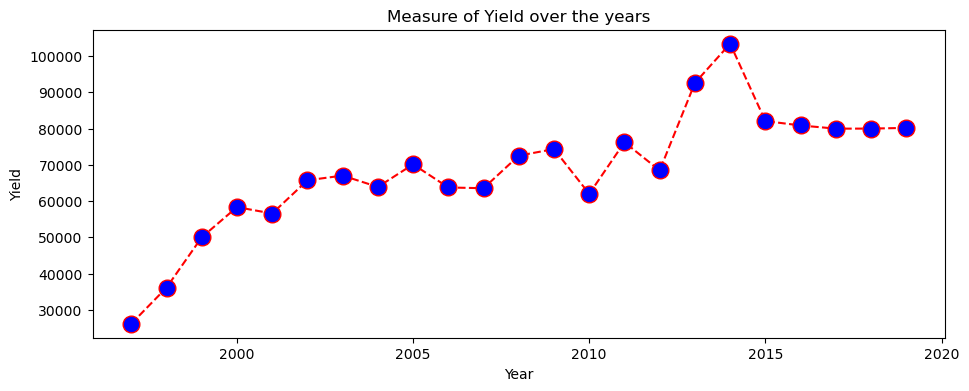

In [111]:
plt.figure(figsize = (11,4))
plt.plot(year_yield.index, year_yield['Yield'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the years')
plt.show()

It is observed that the yeild has increased over the year, but there has been significant decrease after 2014. Reasons can be temprature, climate change, fertility, etc.

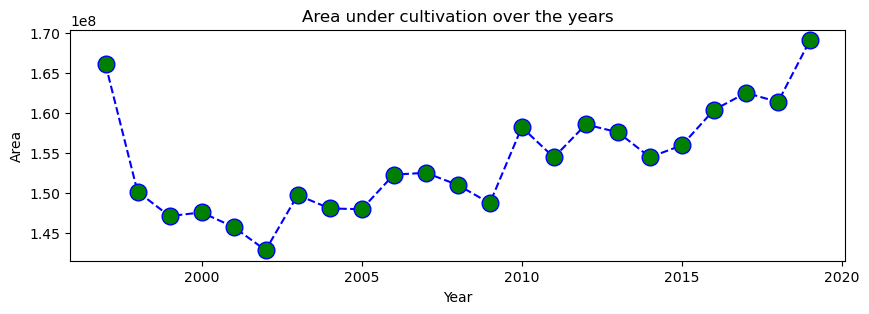

In [112]:
plt.figure(figsize = (10,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the years')
plt.show()

It has been observed that the area under ultivatipon has increased over the year for the purpose of agriculture.

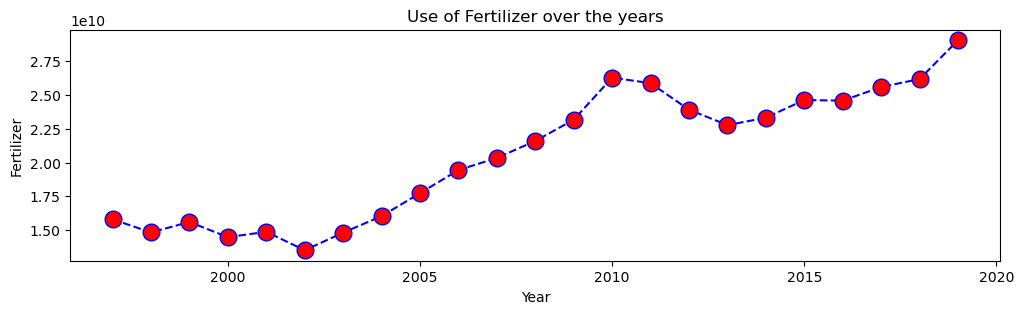

In [113]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the years')
plt.show()

The use of fertilizers has also increased.

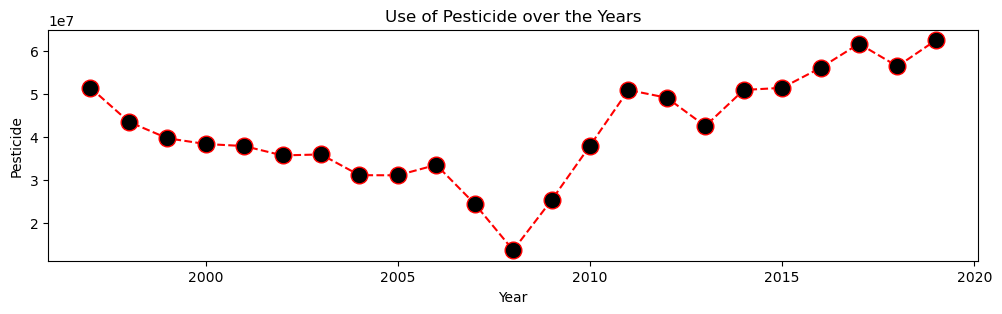

In [114]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Years')
plt.show()

# Statewise Analysis of Agriculture Production

In [115]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

,Crop,Crop_Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,,,
West Bengal,ArecanutArhar/TurBajraBarleyCardamomCastor see...,2196856,Whole Year Whole Year Kharif Whole Year Wh...,2.376823e+08,8941179120,1.883456e+06,2.970480e+10,6.612665e+07,291986.752179
Puducherry,ArecanutBajraBlack pepperCorianderCotton(lint)...,1346899,Kharif Kharif Kharif Kharif Su...,6.535410e+05,493815573,9.599160e+05,8.480729e+07,1.705159e+05,232163.600840
Andhra Pradesh,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,2543550,Whole Year Kharif Rabi Kharif Ra...,2.389253e+08,26076218605,1.160140e+06,3.125890e+10,6.210724e+07,229735.184723
Tamil Nadu,ArecanutArhar/TurBajraBananaCashewnutCastor se...,1652030,Whole Year Kharif Kharif Whole Year Wh...,1.103728e+08,78051759253,7.654142e+05,1.473239e+10,2.956305e+07,185813.281648
Assam,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,1468138,Whole Year Kharif Kharif Whole Year Kh...,7.734260e+07,3637714928,1.531493e+06,1.029304e+10,2.093547e+07,160612.648362
Karnataka,ArecanutArhar/TurBajraBajraBlack pepperCardamo...,2876568,Whole Year Kharif Kharif Summer Kh...,2.579074e+08,63772797366,1.692393e+06,3.458024e+10,6.917312e+07,151391.867808
Kerala,ArecanutBlack pepperCashewnutCoconut TapiocaAr...,1072892,Whole Year Whole Year Whole Year Whole Year Wh...,3.639106e+07,129700649853,1.536641e+06,4.744603e+09,9.647595e+06,147710.353263
Goa,ArecanutBananaBlack pepperCashewnutCoconut Gro...,494067,Whole Year Whole Year Whole Year Whole Year Wh...,2.749600e+06,2193998349,8.247461e+05,3.581078e+08,7.506114e+05,87275.955000
Telangana,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,800319,Kharif Rabi Kharif Rabi Wh...,3.979214e+07,147700034,3.955095e+05,6.262533e+09,1.356572e+07,39508.727733


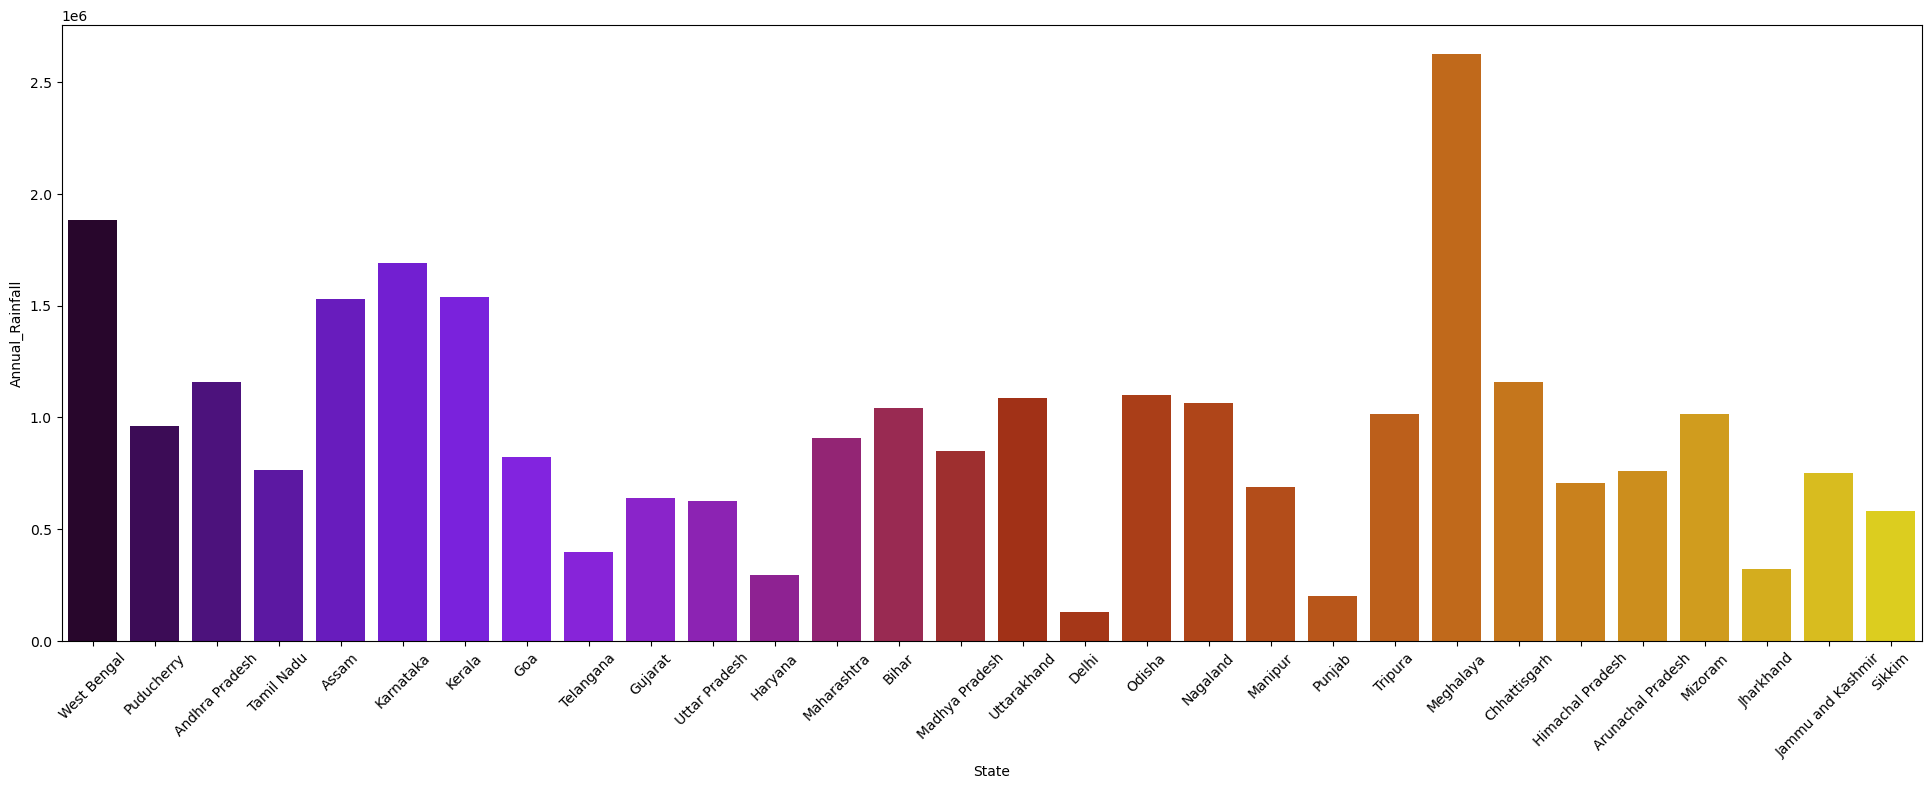

In [116]:
plt.figure(figsize = (24,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

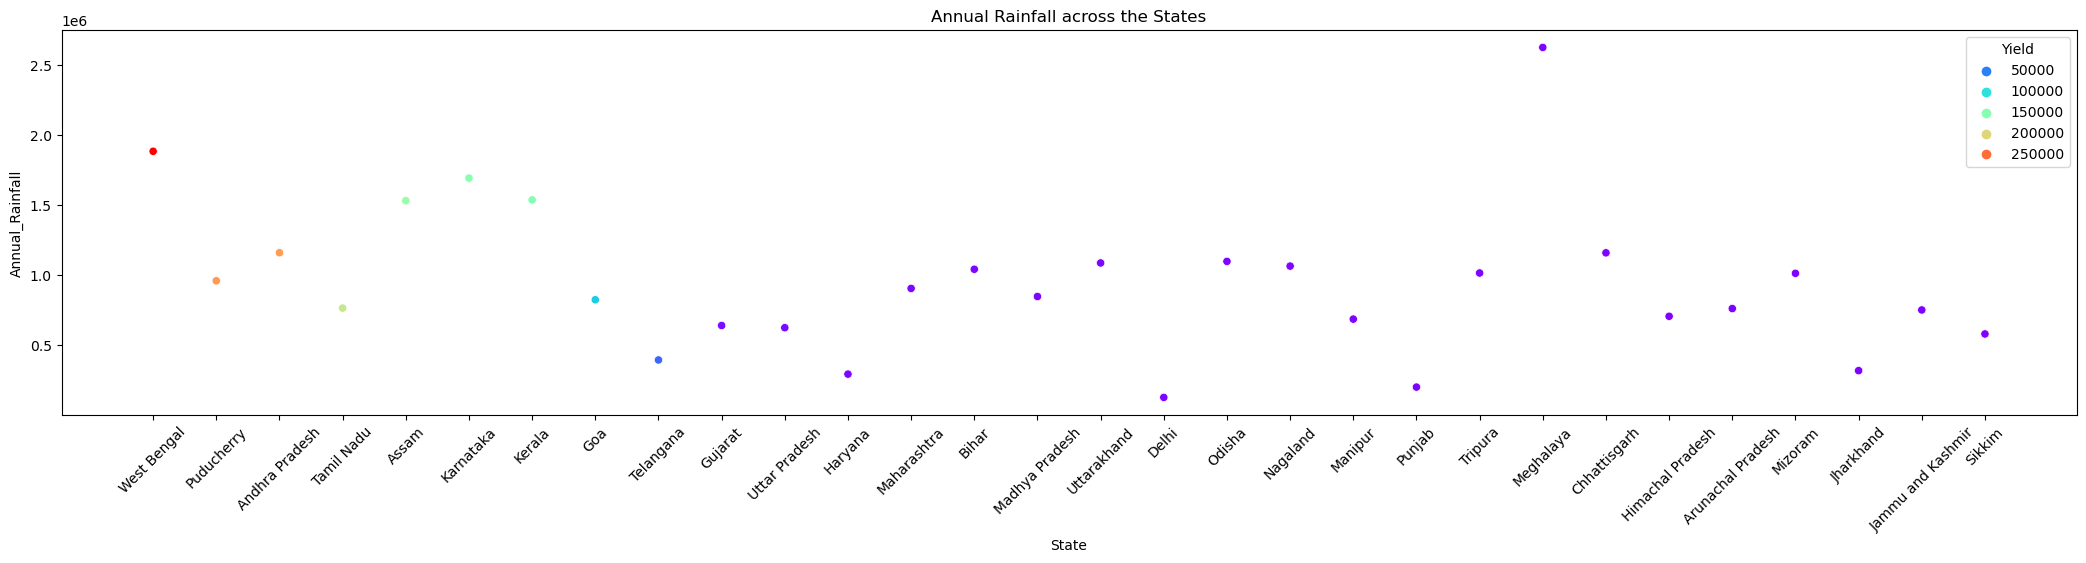

In [117]:
plt.figure(figsize=(26,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

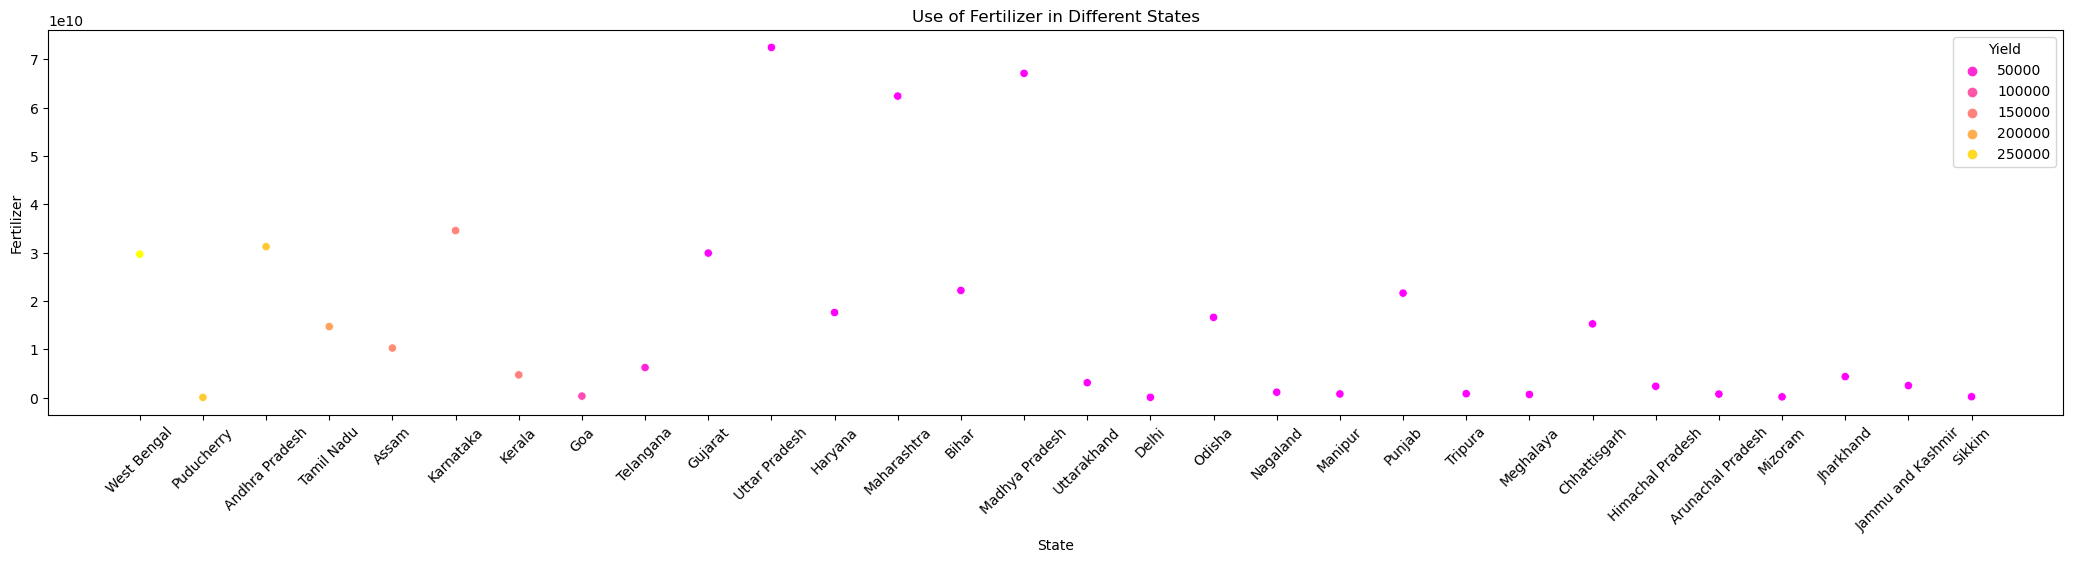

In [118]:
plt.figure(figsize=(26,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

Deductions:
1. West Bengal has the highest yield.
2. Meghalaya has the highest amount of annual rainfall.
3. Uttar Pradesh, Maharashtra and Madhya Pradesh use highest amount of fertilizers but are not having high yield.

# Season wise analysis

In [119]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

,Crop,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Season,,,,,,,,,
Autumn,RiceRagiRiceRiceRiceRiceRiceRiceDry chilliesRi...,832058,AssamWest BengalWest BengalAssamKeralaWest Ben...,5.862637e+07,84406651,7.031759e+05,7.696200e+09,1.552829e+07,1621.837556
Kharif,Arhar/TurCastor seedCotton(lint)JuteMaizeMesta...,16538965,AssamAssamAssamAssamAssamAssamAssamAssamKarnat...,1.702742e+09,5402484780,1.131835e+07,2.282723e+11,4.624902e+08,20431.840607
Rabi,GramLinseedOther Rabi pulsesRapeseed &Mustard...,11539594,AssamAssamAssamAssamAssamKarnatakaKarnatakaKar...,1.172588e+09,2837368229,7.970757e+06,1.564345e+11,3.218366e+08,11418.068860
Summer,RiceBajraJowarMaizeRagiRiceMoong(Green Gram)Ri...,2402524,AssamKarnatakaKarnatakaKarnatakaKarnatakaKarna...,9.879112e+07,243731156,1.565900e+06,1.371903e+10,2.732111e+07,3581.857123
Winter,RiceRiceRiceRiceRiceRiceRicePotatoRiceSesamumR...,781718,AssamWest BengalAssamKeralaWest BengalAssamKer...,2.806847e+08,586507936,6.709910e+05,3.811857e+10,7.590270e+07,2056.746957


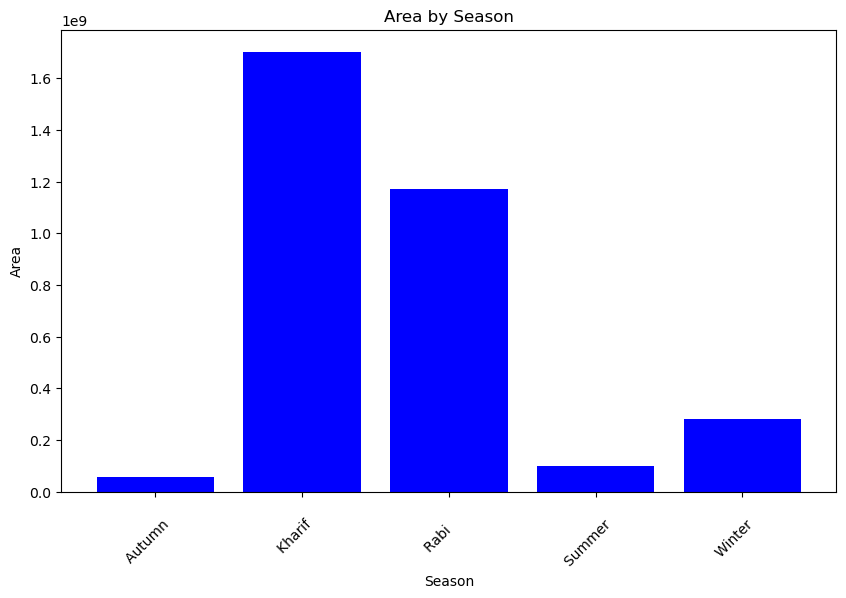

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(df_season.index, df_season['Area'], color='blue')
plt.xlabel('Season')
plt.ylabel('Area')
plt.title('Area by Season')
plt.xticks(rotation=45)
plt.show()

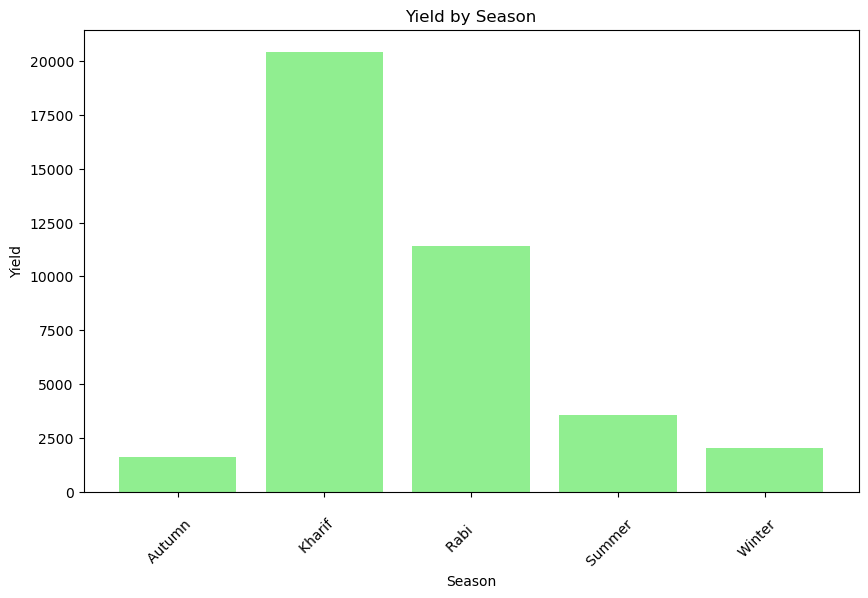

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(df_season.index, df_season['Yield'], color='lightgreen')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.title('Yield by Season')
plt.xticks(rotation=45)
plt.show()

Observations:
1. Area under cultivation is highest in Kharif Season and then in Rabi season.
2. In autumn season yeild is lowest as the area under cultivation is least.
3. In India Kharif season gives the highest yeild.

# Crop wise analysis

In [122]:
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [123]:
df_yz.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
92,Cardamom,1997,Whole Year,West Bengal,2674.0,7,1852.9,254484.58,828.94,0.0
125,Sunflower,1997,Whole Year,West Bengal,278.0,1,1852.9,26457.26,86.18,0.0
1058,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0,648.1,3908356.28,10321.00,0.0
1134,other oilseeds,2002,Whole Year,Kerala,2253.0,0,2511.2,213291.51,563.25,0.0
1135,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0,315.9,469184.52,1239.00,0.0


<Figure size 10000x1500 with 0 Axes>

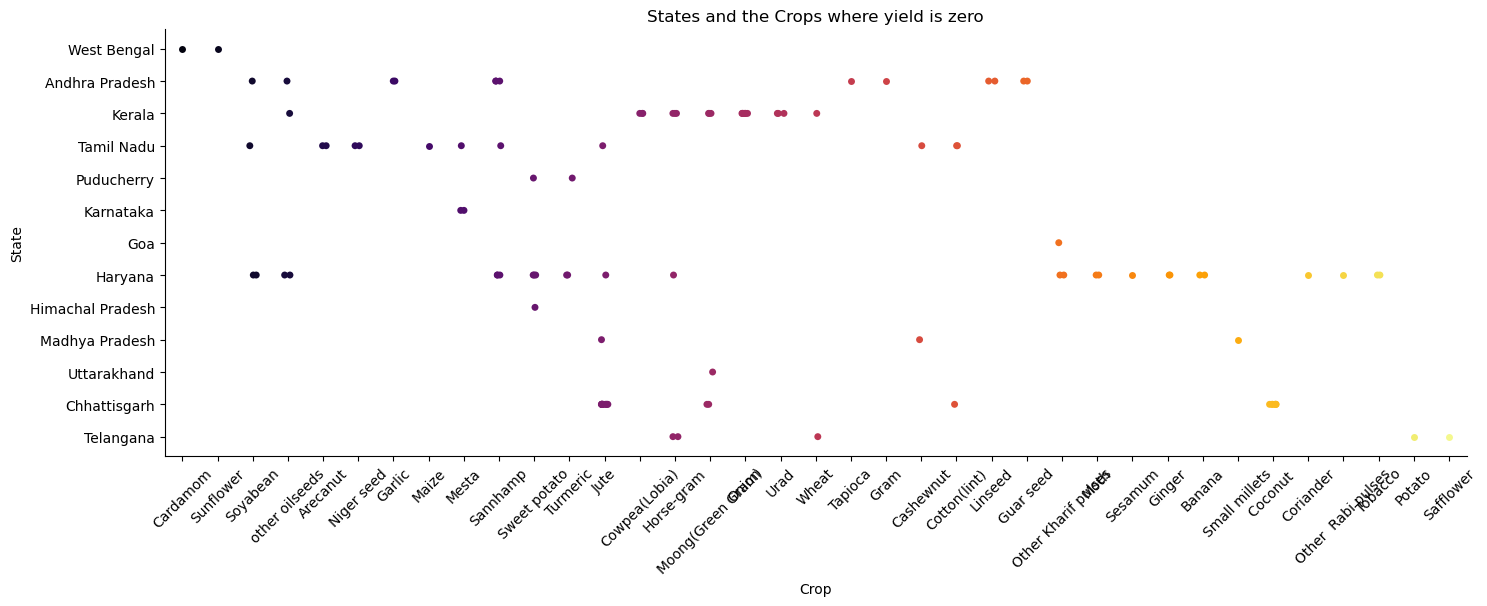

In [124]:
plt.figure(figsize = (100,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()

In [125]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,,,
Arecanut,321347,Whole Year Whole Year Whole Year Whole Year Wh...,AssamKarnatakaKeralaMeghalayaWest BengalPuduch...,8.765158e+06,39144261,3.414578e+05,1.226556e+09,2.449481e+06,3.359289e+02
Arhar/Tur,1020541,Kharif Kharif Kharif Whole Year Kh...,AssamKarnatakaMeghalayaWest BengalAssamKarnata...,8.235357e+07,60913833,7.103078e+05,1.121027e+10,2.280705e+07,4.914127e+02
Bajra,1052589,Kharif Summer Kharif Kharif Kh...,KarnatakaKarnatakaWest BengalPuducherryKarnata...,9.335810e+07,118137047,5.566748e+05,1.205114e+10,2.465983e+07,1.271990e+03
Banana,488061,Whole Year Whole Year Whole Year Whole Year Wh...,MeghalayaAssamGoaKeralaMeghalayaAssamGoaKerala...,7.127321e+06,226471979,4.199956e+05,9.805713e+08,1.916819e+06,6.578526e+03
Barley,596557,Whole Year Rabi Rabi Rabi Ra...,West BengalWest BengalWest BengalWest BengalWe...,9.270084e+06,19498687,3.474722e+05,1.190739e+09,2.472432e+06,4.738754e+02
Black pepper,253163,Kharif Whole Year Kharif Whole Year Wh...,KarnatakaKeralaPuducherryGoaKarnatakaKeralaGoa...,4.362226e+06,2095650,2.700002e+05,5.699445e+08,1.150606e+06,1.045302e+02
Cardamom,146569,Whole Year Whole Year Whole Year Whole Year Wh...,KarnatakaKarnatakaKeralaWest BengalKeralaWest ...,1.305532e+06,255490,1.241488e+05,1.714790e+08,3.433323e+05,1.245829e+01
Cashewnut,265313,Whole Year Whole Year Whole Year Whole Year Wh...,KeralaGoaKeralaGoaKeralaPuducherryAndhra Prade...,7.472794e+06,3737207,2.581485e+05,1.005401e+09,2.003926e+06,4.181387e+02
Castor seed,602681,Kharif Rabi Whole Year Kharif Kh...,AssamMeghalayaWest BengalAssamKarnatakaWest Be...,1.659632e+07,24049211,4.144262e+05,2.248189e+09,4.560667e+06,2.080828e+02


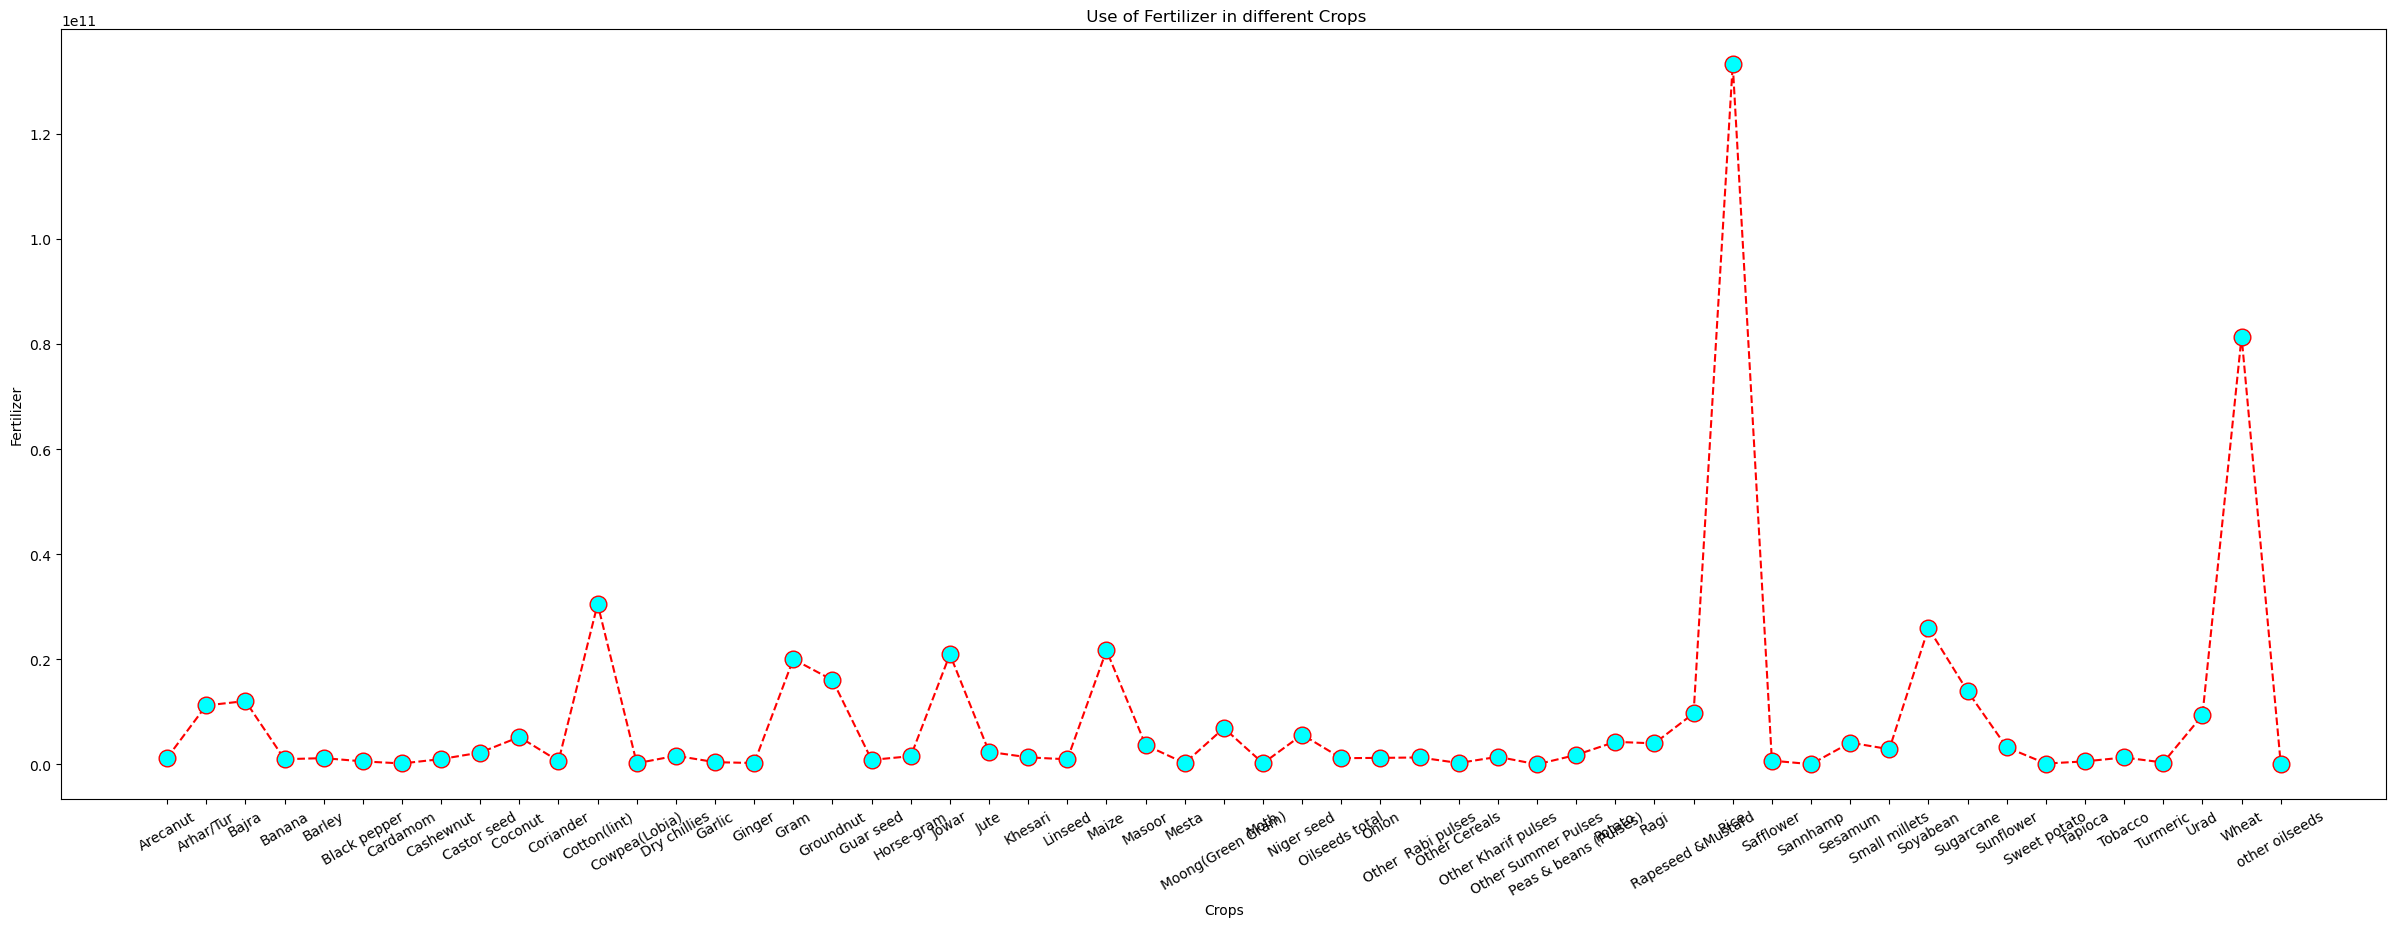

In [126]:
plt.figure(figsize = (30,10))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

Observations:
1. Maximum fertilizers are been used in Rice.
2. After Rice, wheat is using maximum amount of fertilizers.

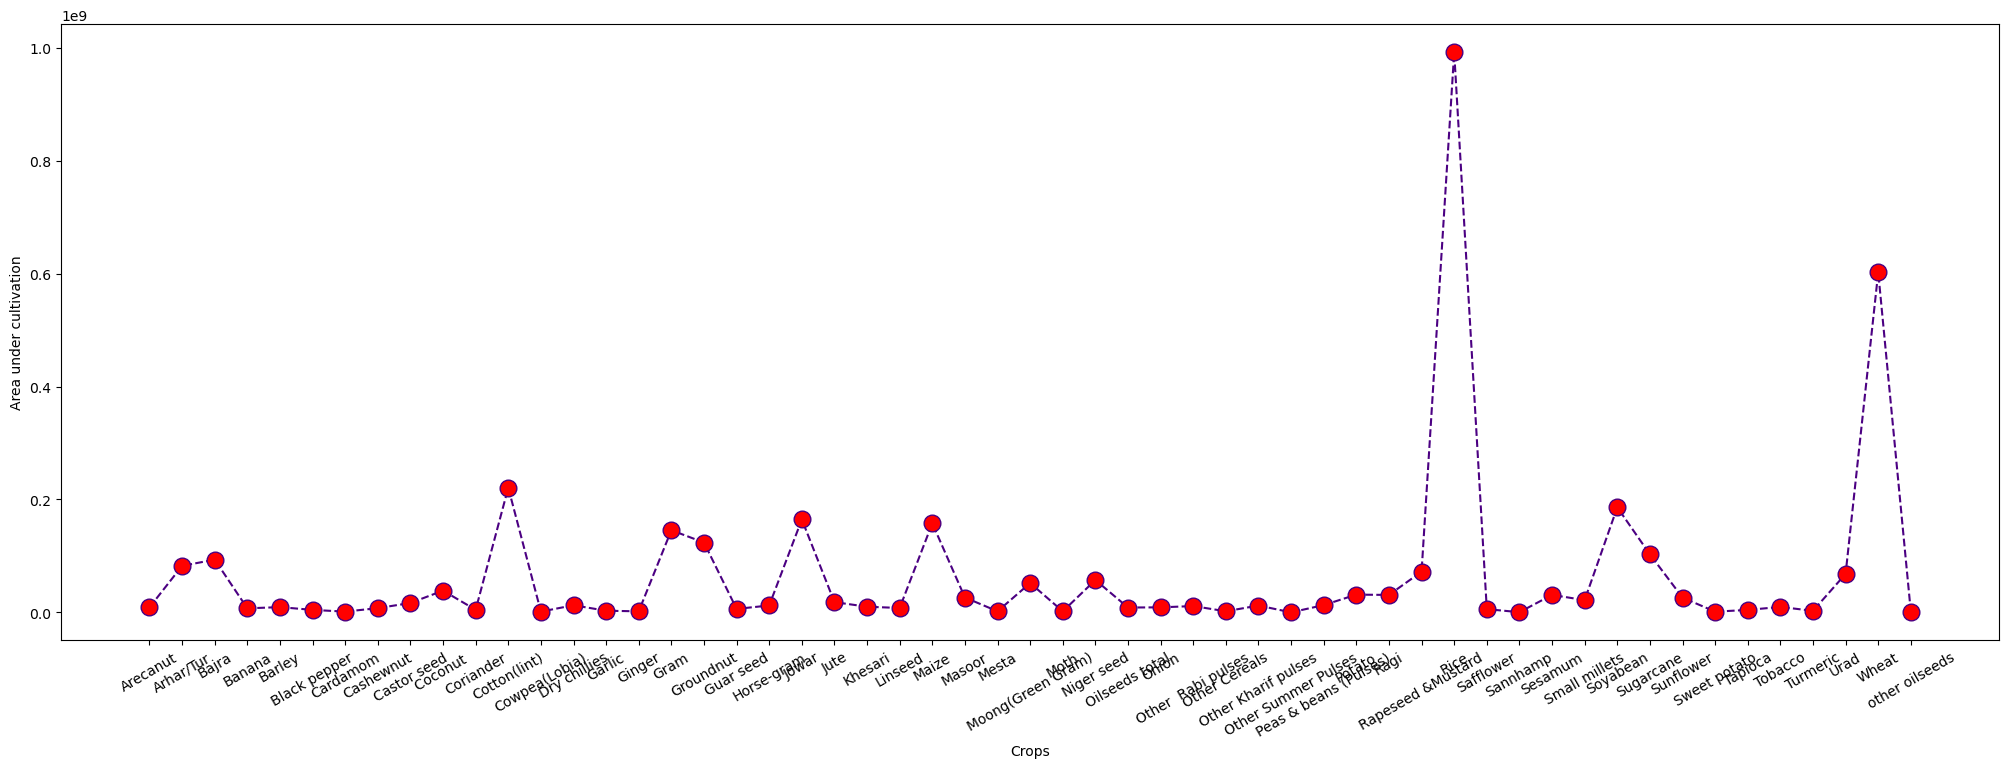

In [127]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

Area under cultivaion is largest for rice and wheat

# Analysis of Wheat crop

In [128]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)
df_wheat

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Wheat,1997,Rabi,Assam,84698.0,110054,2051.4,8060708.66,26256.38,1.259524
1,Wheat,1997,Rabi,Karnataka,250698.0,118512,1266.7,23858928.66,77716.38,0.548333
2,Wheat,1997,Rabi,Meghalaya,4287.0,6894,3818.2,407993.79,1328.97,1.385000
3,Wheat,1997,Rabi,West Bengal,367374.0,810480,1852.9,34962983.58,113885.94,1.886667
4,Wheat,1998,Rabi,Assam,89591.0,90509,2354.4,8851590.80,25981.39,0.999545
...,...,...,...,...,...,...,...,...,...,...
540,Wheat,2016,Summer,Odisha,57.0,80,1460.5,8735.25,19.95,0.950000
541,Wheat,2017,Summer,Odisha,73.0,158,1344.4,11493.12,27.74,2.387143
542,Wheat,2018,Summer,Odisha,147.0,268,1635.9,23843.40,51.45,1.825000
543,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000


In [129]:
df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
df_wheat_year = df_wheat1.groupby('Crop_Year').sum()
df_wheat_year

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,AssamKarnatakaMeghalayaWest BengalOdishaAndhra...,23500898.00,57999331,26765.700000,2.236580e+09,7.285278e+06,27.898176
1998,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,AssamKarnatakaMeghalayaWest BengalAndhra Prade...,24431921.00,63793372,36709.200000,2.413874e+09,7.085257e+06,37.380180
1999,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,AssamWest BengalBiharGujaratHaryanaHimachal Pr...,24503856.00,69250974,24912.400000,2.600594e+09,6.616041e+06,36.165537
2000,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,23338921.00,64029373,32021.900000,2.291182e+09,6.068119e+06,40.728373
2001,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,24027129.00,66343193,30835.900000,2.453891e+09,6.247054e+06,41.967366
2002,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamWest BengalBiharChhattisgar...,23410674.69,60953946,30737.700000,2.216289e+09,5.852669e+06,42.687343
2003,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,24734430.70,66979279,34939.400000,2.448214e+09,5.936263e+06,43.222580
2004,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,KarnatakaMeghalayaAndhra PradeshAssamBiharChha...,24789592.58,63933294,35241.300000,2.685704e+09,5.205814e+06,44.138495
2005,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,24101857.23,61514930,34308.900000,2.890295e+09,5.061390e+06,40.127099


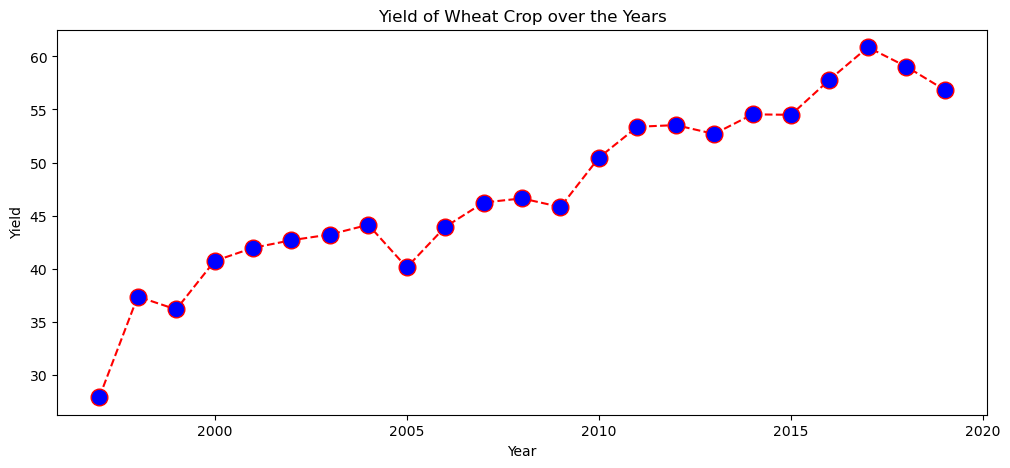

In [130]:
plt.figure(figsize = (12,5))
plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield of Wheat Crop over the Years')
plt.show()

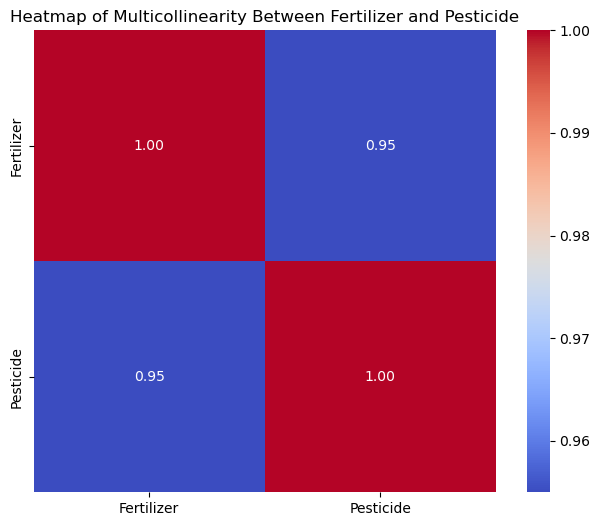

In [131]:
correlation_matrix = df[['Fertilizer', 'Pesticide']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Multicollinearity Between Fertilizer and Pesticide')
plt.show()

As its showing multicollinearity we need to drop one column

In [132]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

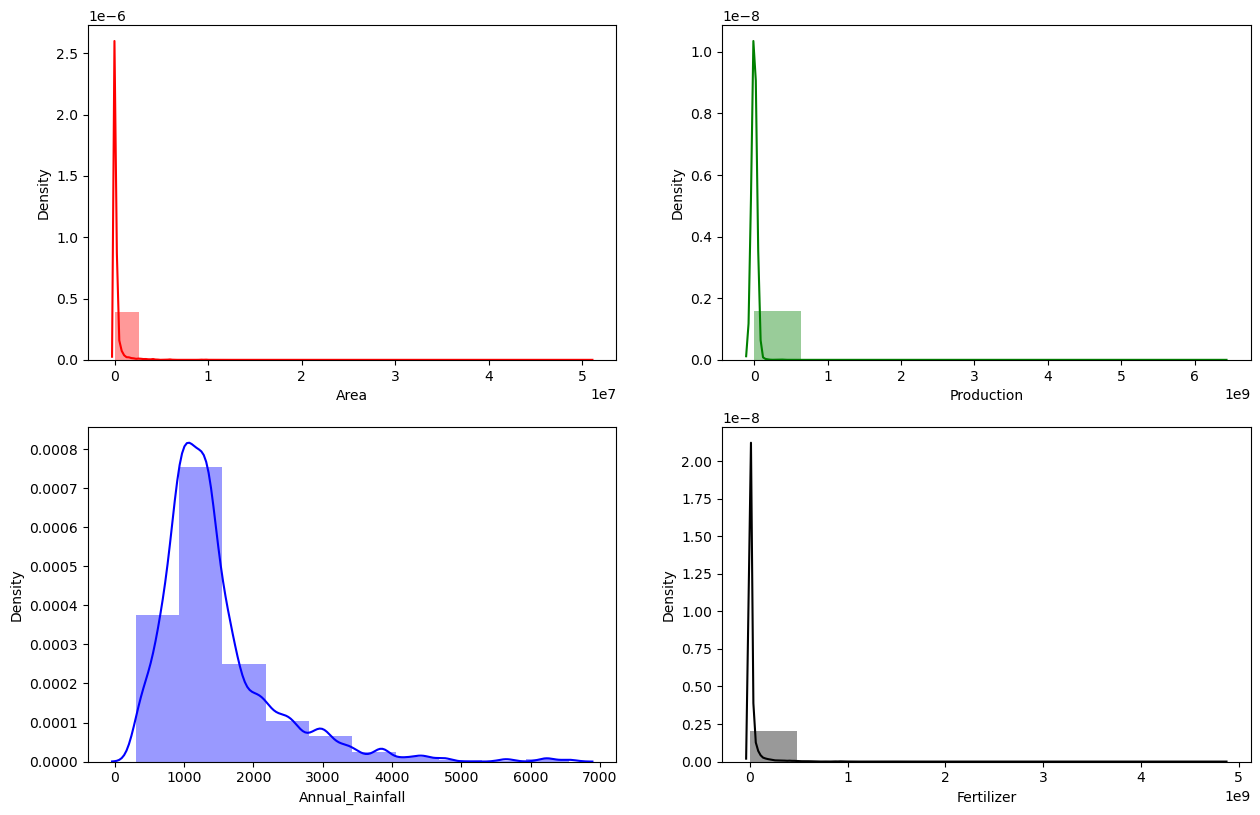

In [133]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df1['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df1['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(df1['Fertilizer'],bins = 10, color = 'black')
plt.show()

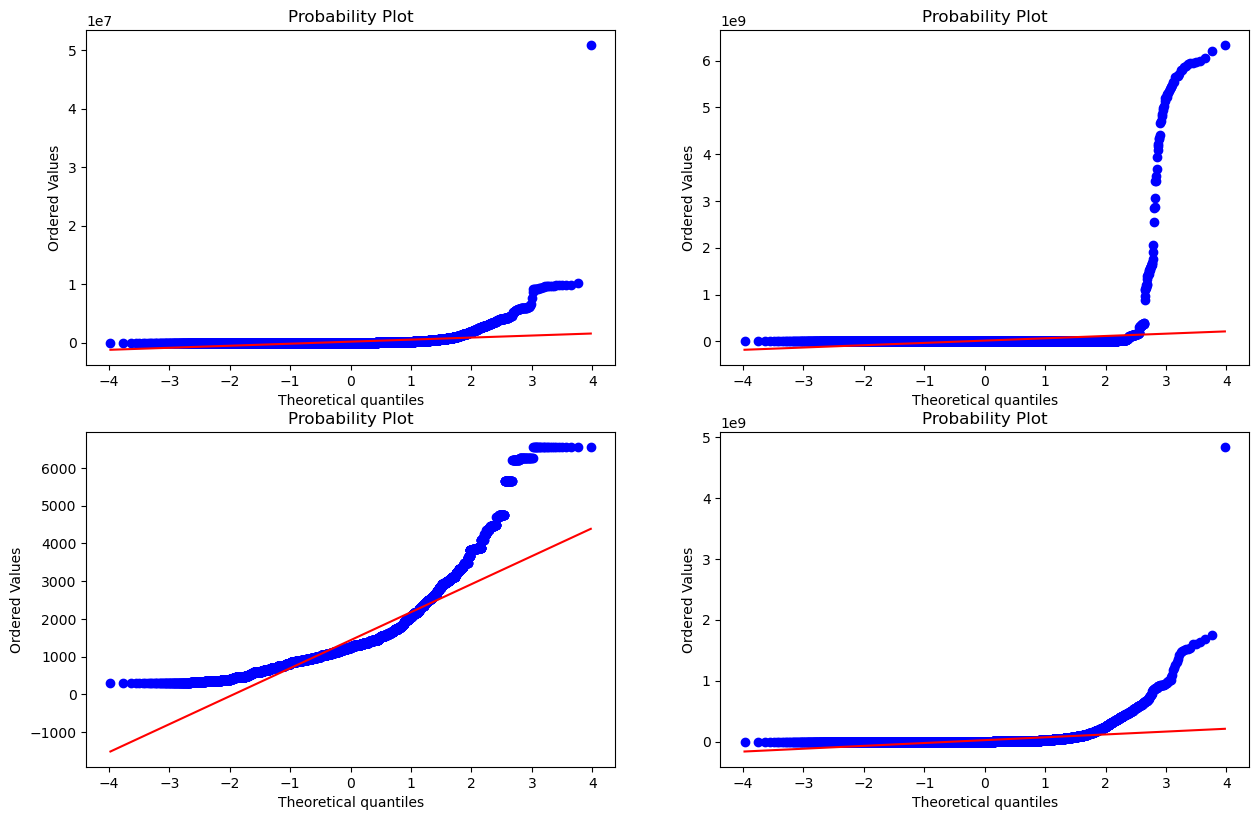

In [135]:
import scipy.stats as stats
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

As its showing right skewness we need to perform tranformations on the dataset, as the model will be biased in prediction.
We need to perform one hot encoding to transform categorical data in a way that can be provided to machine learning algorithms.

# One-Hot Encoding

In [136]:
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [137]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [138]:
df1.shape

(19689, 93)

In [139]:
df1.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,0.710435,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,0.238333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,5238.051739,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,0.420909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Split the data into independent and dependent variables

In [140]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [141]:
print(x.shape)
y.shape

(19689, 92)


(19689, 1)

In [142]:
x.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
y.head()

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


Splitting the dataset into training and testing datasets

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [145]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15751, 92), (3938, 92), (15751, 1), (3938, 1))

# Power Transformation using Yeo-Johnson

In [146]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

In [147]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.075788,-0.715962,1.907533,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.522011,-1.187932,-1.238092,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-1.239694,-1.428779,-0.699476,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.247029,0.197346,0.054274,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,1.485555,0.978650,-0.898001,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


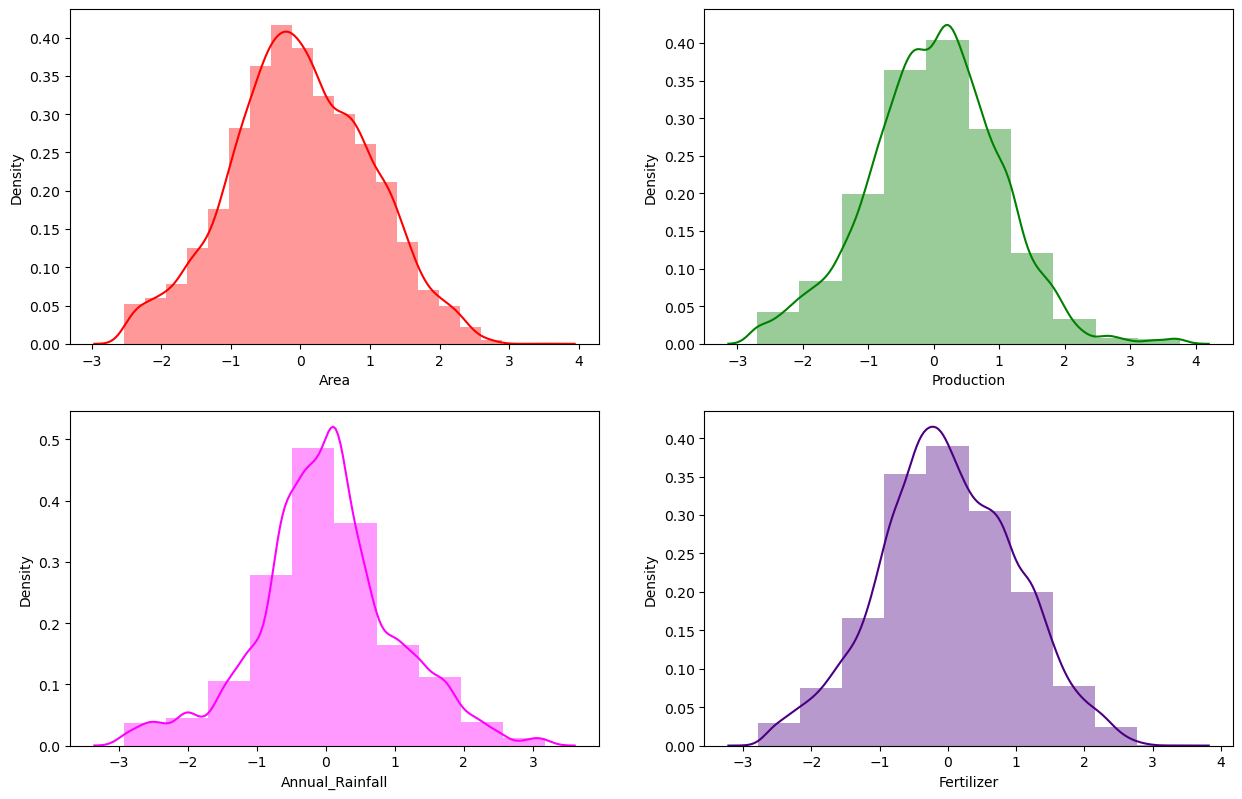

In [148]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df_trans['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df_trans['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df_trans['Annual_Rainfall'],bins = 10,color = 'fuchsia')
plt.subplot(4,2,4)
sns.distplot(df_trans['Fertilizer'],bins = 10, color = 'indigo')

plt.show()

Viewing Q-Q plot after tranformation

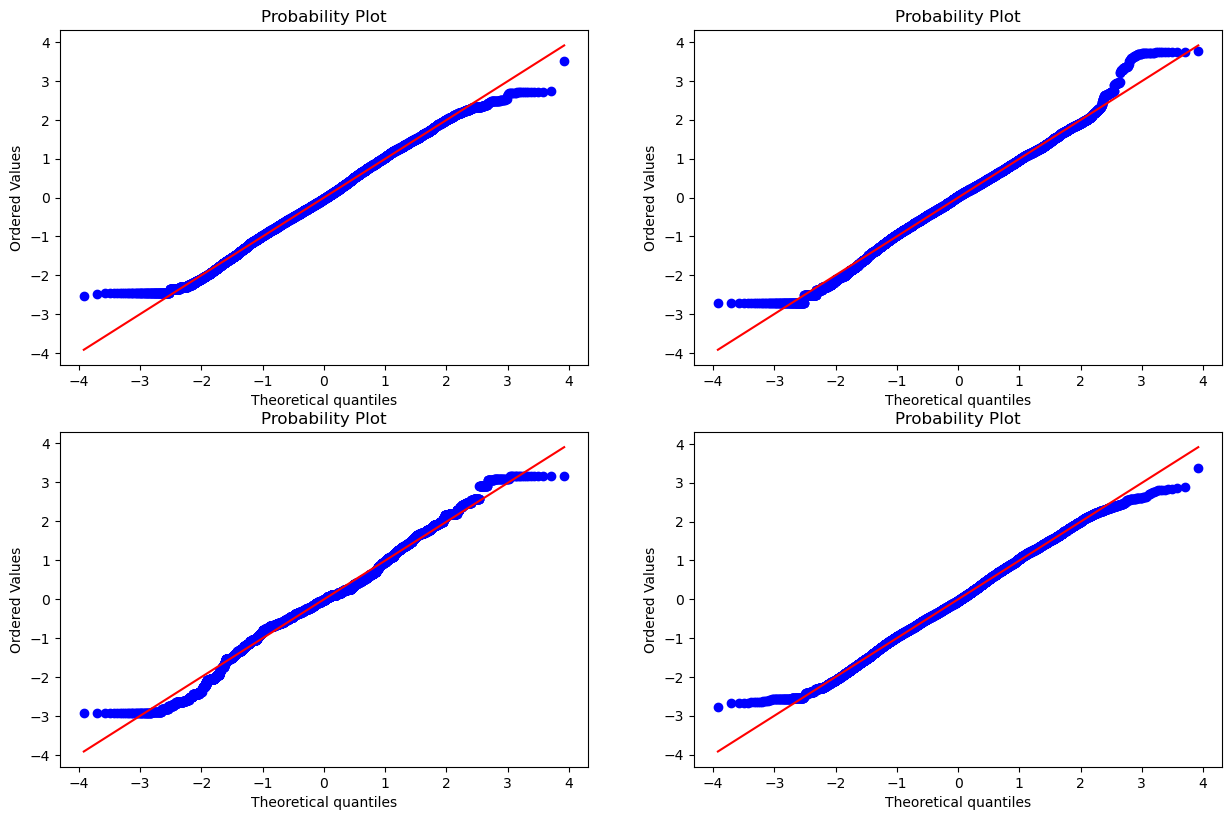

In [149]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df_trans['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df_trans['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df_trans['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df_trans['Fertilizer'], dist = 'norm', plot = plt)

plt.show()

# Linear Regression with skewed data

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ",r2_score(y_train,y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

Training Accuracy :  0.8528573757796829
Test Accuracy :  0.8021979876986389


In [151]:
# to store accuracy value
train_accu = []
test_accu = []

# Linear Regression (Transformation approach)

In [152]:
lr.fit(x_train_transform1, y_train)

y_pred_train_ = lr.predict(x_train_transform1)
y_pred_test_ = lr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8567977421355503

Test Accuracy :  0.8201354232680313


Test Accuracy has improved after 'Yeo-Johnson' Transformation, here it is showing no case of overfitting or underfitting

# Variance Inflation Factor

In [153]:
x1 = df_trans.copy()

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x1

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x1.columns

In [155]:
vif

,Variance Inflation Factor,Features
0,212.854374,Area
1,19.941413,Production
2,6.559733,Annual_Rainfall
3,212.233909,Fertilizer
4,4.404064,Crop_Arhar/Tur
...,...,...
87,1.333944,State_Telangana
88,1.909404,State_Tripura
89,1.717452,State_Uttar Pradesh
90,1.876362,State_Uttarakhand


VIF should be less than 5 to remove multicollinearity.

In [156]:
x2 = x1.copy()

In [157]:
x2.drop(['Area'], axis = 1, inplace=True)

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [159]:
vif

,Variance Inflation Factor,Features
0,19.558373,Production
1,6.539186,Annual_Rainfall
2,18.454511,Fertilizer
3,4.399640,Crop_Arhar/Tur
4,4.580411,Crop_Bajra
...,...,...
86,1.321747,State_Telangana
87,1.908488,State_Tripura
88,1.717443,State_Uttar Pradesh
89,1.876031,State_Uttarakhand


In [160]:
x2.drop(['Production'], axis = 1, inplace=True)

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [162]:
vif

,Variance Inflation Factor,Features
0,6.538881,Annual_Rainfall
1,2.233152,Fertilizer
2,4.390040,Crop_Arhar/Tur
3,4.580093,Crop_Bajra
4,2.504848,Crop_Banana
...,...,...
85,1.319783,State_Telangana
86,1.904214,State_Tripura
87,1.717159,State_Uttar Pradesh
88,1.874372,State_Uttarakhand


In [163]:
x2.head()

,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1.907533,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.238092,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-0.699476,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.054274,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,-0.898001,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


In [164]:
x_test1 = pd.DataFrame(x_test_transform1, columns=x_test.columns)
x_test1.drop(['Area','Production'], axis = 1, inplace = True)

In [165]:
x_test1 = pd.DataFrame(x_test_transform1, columns=x_test.columns)
x_test1.drop(['Area','Production'], axis = 1, inplace = True)
# After applying vif
lr.fit(x2, y_train)

y_pred_train_ = lr.predict(x2)
y_pred_test_ = lr.predict(x_test1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8513570270699844

Test Accuracy :  0.8106978418521673


# Random Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train_transform1, y_train)

y_pred_train_regr= regr.predict(x_train_transform1)
y_pred_test_regr = regr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train,y_pred_train_regr))
test_accu.append(r2_score(y_test,y_pred_test_regr))

Training Accuracy :  0.9966630030783656
Test Accuracy :  0.9819440644576525


# Support Vector Regressor

In [167]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_transform1, y_train)

y_pred_train_svr= svr.predict(x_train_transform1)
y_pred_test_svr = svr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train,y_pred_train_svr))
test_accu.append(r2_score(y_test,y_pred_test_svr))

Training Accuracy :  0.007605154857080132
Test Accuracy :  0.00665600716055037


# Comparison of Models

In [168]:
algorithm = ['LinearRegression','LRvif','RandomForestRegressor','SupprtVectorRegressor']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
LinearRegression,0.856798,0.820135
LRvif,0.851357,0.810698
RandomForestRegressor,0.996663,0.981944
SupprtVectorRegressor,0.007605,0.006656
